## <font size=5> <strong> Predicting presence of Heart Disease using Machine Learning  </strong> </font>

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## II. Importing and understanding our dataset 

In [4]:
dataset = pd.read_csv("C:/Users/Katta's/PycharmProjects/data/usecase2/heart.csv")

#### Verifying it as a 'dataframe' object in pandas

#### Shape of dataset

#### Printing out a few columns


#### Description


#### Let's understand our columns better:

#### Analysing the 'target' variable


#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

In [18]:
y = dataset["target"]

### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature


##### We notice, that as expected, the 'sex' feature has 2 unique features

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature


##### As expected, the CP feature has values from 0 to 3

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature




##### Nothing extraordinary here

### Analysing the restecg feature



##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature



##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature



##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

##### ca=4 has astonishingly large number of heart patients

In [26]:
from sklearn.model_selection import train_test_split
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)
from sklearn.metrics import accuracy_score
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=300)
Y_pred_nn = model.predict(X_test)
Y_pred_nn.shape
rounded = [round(x[0]) for x in Y_pred_nn]
Y_pred_nn = rounded
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Use tf.cast instead.


Epoch 1/300


 32/242 [==>...........................] - ETA: 2s - loss: 9.0238 - acc: 0.3750

242/242 [==============================] - 0s 2ms/step - loss: 8.2416 - acc: 0.3967


Epoch 2/300
 32/242 [==>...........................] - ETA: 0s - loss: 9.4074 - acc: 0.3125

242/242 [==============================] - 0s 79us/step - loss: 8.0389 - acc: 0.4008


Epoch 3/300
 32/242 [==>...........................] - ETA: 0s - loss: 8.0515 - acc: 0.4375

242/242 [==============================] - 0s 111us/step - loss: 7.5984 - acc: 0.3926


Epoch 4/300
 32/242 [==>...........................] - ETA: 0s - loss: 7.2402 - acc: 0.2812

242/242 [==============================] - 0s 78us/step - loss: 6.9846 - acc: 0.4091


Epoch 5/300
 32/242 [==>...........................] - ETA: 0s - loss: 10.3490 - acc: 0.2812

242/242 [==============================] - 0s 91us/step - loss: 6.5802 - acc: 0.4752


Epoch 6/300
 32/242 [==>...........................] - ETA: 0s - loss: 6.6031 - acc: 0.4375

242/242 [==============================] - 0s 77us/step - loss: 6.3956 - acc: 0.4876


Epoch 7/300
 32/242 [==>...........................] - ETA: 0s - loss: 5.4249 - acc: 0.5312

242/242 [==============================] - 0s 99us/step - loss: 6.2255 - acc: 0.4917


Epoch 8/300


 32/242 [==>...........................] - ETA: 0s - loss: 7.1100 - acc: 0.5000



242/242 [==============================] - 0s 95us/step - loss: 6.0737 - acc: 0.4917


Epoch 9/300


 32/242 [==>...........................] - ETA: 0s - loss: 6.1717 - acc: 0.5000

242/242 [==============================] - 0s 120us/step - loss: 5.9277 - acc: 0.4835


Epoch 10/300
 32/242 [==>...........................] - ETA: 0s - loss: 6.1587 - acc: 0.5312

242/242 [==============================] - 0s 119us/step - loss: 5.7550 - acc: 0.4835


Epoch 11/300
 32/242 [==>...........................] - ETA: 0s - loss: 5.7902 - acc: 0.4375

242/242 [==============================] - 0s 77us/step - loss: 5.4351 - acc: 0.4917


Epoch 12/300


 32/242 [==>...........................] - ETA: 0s - loss: 5.4222 - acc: 0.5312



242/242 [==============================] - 0s 85us/step - loss: 5.1330 - acc: 0.5124


Epoch 13/300
 32/242 [==>...........................] - ETA: 0s - loss: 4.5622 - acc: 0.5312



242/242 [==============================] - 0s 107us/step - loss: 4.8025 - acc: 0.5083


Epoch 14/300
 32/242 [==>...........................] - ETA: 0s - loss: 7.5955 - acc: 0.3438

242/242 [==============================] - 0s 96us/step - loss: 4.5256 - acc: 0.5000


Epoch 15/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 3.1333 - acc: 0.5000



242/242 [==============================] - 0s 103us/step - loss: 4.3649 - acc: 0.5248


Epoch 16/300
 32/242 [==>...........................] - ETA: 0s - loss: 5.0085 - acc: 0.5000



242/242 [==============================] - 0s 74us/step - loss: 4.2196 - acc: 0.5289


Epoch 17/300


 32/242 [==>...........................] - ETA: 0s - loss: 3.9647 - acc: 0.5000



242/242 [==============================] - 0s 109us/step - loss: 4.1375 - acc: 0.5207


Epoch 18/300
 32/242 [==>...........................] - ETA: 0s - loss: 4.0730 - acc: 0.5938



242/242 [==============================] - 0s 87us/step - loss: 4.0082 - acc: 0.5083


Epoch 19/300
 32/242 [==>...........................] - ETA: 0s - loss: 3.5159 - acc: 0.5938



242/242 [==============================] - 0s 78us/step - loss: 3.8515 - acc: 0.5124


Epoch 20/300
 32/242 [==>...........................] - ETA: 0s - loss: 3.6462 - acc: 0.5938



242/242 [==============================] - 0s 70us/step - loss: 3.6685 - acc: 0.5124


Epoch 21/300
 32/242 [==>...........................] - ETA: 0s - loss: 3.2874 - acc: 0.5000



242/242 [==============================] - 0s 91us/step - loss: 3.5013 - acc: 0.5248


Epoch 22/300
 32/242 [==>...........................] - ETA: 0s - loss: 3.9597 - acc: 0.5000



242/242 [==============================] - 0s 74us/step - loss: 3.2393 - acc: 0.5248


Epoch 23/300
 32/242 [==>...........................] - ETA: 0s - loss: 4.6441 - acc: 0.3750

242/242 [==============================] - 0s 62us/step - loss: 2.9626 - acc: 0.5331


Epoch 24/300


 32/242 [==>...........................] - ETA: 0s - loss: 3.1683 - acc: 0.4688



242/242 [==============================] - 0s 78us/step - loss: 2.7160 - acc: 0.5413


Epoch 25/300
 32/242 [==>...........................] - ETA: 0s - loss: 2.4610 - acc: 0.5000



242/242 [==============================] - 0s 70us/step - loss: 2.5197 - acc: 0.5413


Epoch 26/300
 32/242 [==>...........................] - ETA: 0s - loss: 3.1371 - acc: 0.4062



242/242 [==============================] - 0s 78us/step - loss: 2.3452 - acc: 0.5579


Epoch 27/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.7762 - acc: 0.6562



242/242 [==============================] - 0s 76us/step - loss: 2.2152 - acc: 0.5826


Epoch 28/300
 32/242 [==>...........................] - ETA: 0s - loss: 2.4851 - acc: 0.5000



242/242 [==============================] - 0s 74us/step - loss: 2.1269 - acc: 0.5661


Epoch 29/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.4366 - acc: 0.6875

242/242 [==============================] - 0s 75us/step - loss: 1.9853 - acc: 0.5785


Epoch 30/300
 32/242 [==>...........................] - ETA: 0s - loss: 2.1136 - acc: 0.5625



242/242 [==============================] - 0s 74us/step - loss: 1.9402 - acc: 0.5992


Epoch 31/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.7786 - acc: 0.6562



242/242 [==============================] - 0s 87us/step - loss: 1.8889 - acc: 0.6033


Epoch 32/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.5375 - acc: 0.6875



242/242 [==============================] - 0s 87us/step - loss: 1.8147 - acc: 0.6074


Epoch 33/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.8887 - acc: 0.5625



242/242 [==============================] - 0s 87us/step - loss: 1.6791 - acc: 0.6322


Epoch 34/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.8125 - acc: 0.5000



242/242 [==============================] - 0s 103us/step - loss: 1.6586 - acc: 0.5992


Epoch 35/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.7436 - acc: 0.5938



242/242 [==============================] - 0s 128us/step - loss: 1.6033 - acc: 0.6322


Epoch 36/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.6675 - acc: 0.5938



242/242 [==============================] - 0s 124us/step - loss: 1.5429 - acc: 0.6364


Epoch 37/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.4802 - acc: 0.6562



242/242 [==============================] - 0s 103us/step - loss: 1.4789 - acc: 0.6405


Epoch 38/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.2564 - acc: 0.6875



242/242 [==============================] - 0s 80us/step - loss: 1.4215 - acc: 0.6446


Epoch 39/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.3724 - acc: 0.6250



242/242 [==============================] - 0s 70us/step - loss: 1.3877 - acc: 0.6405


Epoch 40/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.7462 - acc: 0.5000



242/242 [==============================] - 0s 91us/step - loss: 1.3456 - acc: 0.6364


Epoch 41/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.3669 - acc: 0.6250



242/242 [==============================] - 0s 86us/step - loss: 1.2942 - acc: 0.6446


Epoch 42/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.8287 - acc: 0.5625

242/242 [==============================] - 0s 70us/step - loss: 1.2767 - acc: 0.6736


Epoch 43/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.2834 - acc: 0.6875

242/242 [==============================] - 0s 82us/step - loss: 1.2223 - acc: 0.6529


Epoch 44/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5566 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 1.2124 - acc: 0.6446


Epoch 45/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.7157 - acc: 0.7812

242/242 [==============================] - 0s 78us/step - loss: 1.1663 - acc: 0.6612


Epoch 46/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.2695 - acc: 0.6250

242/242 [==============================] - 0s 82us/step - loss: 1.1384 - acc: 0.6777


Epoch 47/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.1313 - acc: 0.6875



242/242 [==============================] - 0s 74us/step - loss: 1.1055 - acc: 0.6860


Epoch 48/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.1177 - acc: 0.6562

242/242 [==============================] - 0s 84us/step - loss: 1.0877 - acc: 0.6860


Epoch 49/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.8986 - acc: 0.6562



242/242 [==============================] - 0s 74us/step - loss: 1.0714 - acc: 0.6570


Epoch 50/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.7941 - acc: 0.5938



242/242 [==============================] - 0s 83us/step - loss: 1.0430 - acc: 0.6653


Epoch 51/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.8969 - acc: 0.7500



242/242 [==============================] - 0s 91us/step - loss: 1.0099 - acc: 0.6818


Epoch 52/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6846 - acc: 0.6875



242/242 [==============================] - 0s 95us/step - loss: 0.9968 - acc: 0.6860


Epoch 53/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.9329 - acc: 0.7500



242/242 [==============================] - 0s 87us/step - loss: 1.0001 - acc: 0.7066


Epoch 54/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.5305 - acc: 0.5625

242/242 [==============================] - 0s 82us/step - loss: 0.9488 - acc: 0.6860


Epoch 55/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.9441 - acc: 0.5938



242/242 [==============================] - 0s 78us/step - loss: 0.9372 - acc: 0.6901


Epoch 56/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.0403 - acc: 0.6250



242/242 [==============================] - 0s 66us/step - loss: 0.9163 - acc: 0.7025


Epoch 57/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.1971 - acc: 0.6562



242/242 [==============================] - 0s 82us/step - loss: 0.8937 - acc: 0.6942


Epoch 58/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.8455 - acc: 0.6875



242/242 [==============================] - 0s 82us/step - loss: 0.8838 - acc: 0.6901


Epoch 59/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.2191 - acc: 0.6562



242/242 [==============================] - 0s 70us/step - loss: 0.8567 - acc: 0.6942


Epoch 60/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.0268 - acc: 0.5625

242/242 [==============================] - 0s 83us/step - loss: 0.8472 - acc: 0.6983


Epoch 61/300


 32/242 [==>...........................] - ETA: 0s - loss: 1.1370 - acc: 0.5938



242/242 [==============================] - 0s 103us/step - loss: 0.8255 - acc: 0.7066


Epoch 62/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.9656 - acc: 0.6875



242/242 [==============================] - 0s 124us/step - loss: 0.8192 - acc: 0.7107


Epoch 63/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.7513 - acc: 0.7188



242/242 [==============================] - 0s 83us/step - loss: 0.8001 - acc: 0.7107


Epoch 64/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.9444 - acc: 0.6562



242/242 [==============================] - 0s 112us/step - loss: 0.7929 - acc: 0.7066


Epoch 65/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.9697 - acc: 0.7188



242/242 [==============================] - 0s 70us/step - loss: 0.7655 - acc: 0.7190


Epoch 66/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3834 - acc: 0.8438



242/242 [==============================] - 0s 74us/step - loss: 0.7583 - acc: 0.7273


Epoch 67/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3893 - acc: 0.7500



242/242 [==============================] - 0s 70us/step - loss: 0.7372 - acc: 0.7273


Epoch 68/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.8511 - acc: 0.6250



242/242 [==============================] - 0s 88us/step - loss: 0.7426 - acc: 0.7273


Epoch 69/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.9203 - acc: 0.6875



242/242 [==============================] - 0s 82us/step - loss: 0.7290 - acc: 0.7190


Epoch 70/300
 32/242 [==>...........................] - ETA: 0s - loss: 1.0225 - acc: 0.6250

242/242 [==============================] - 0s 76us/step - loss: 0.7034 - acc: 0.7273


Epoch 71/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4811 - acc: 0.7500



242/242 [==============================] - 0s 91us/step - loss: 0.6933 - acc: 0.7397


Epoch 72/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4900 - acc: 0.8125

242/242 [==============================] - 0s 87us/step - loss: 0.6752 - acc: 0.7438


Epoch 73/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4934 - acc: 0.8438



242/242 [==============================] - 0s 70us/step - loss: 0.6737 - acc: 0.7438


Epoch 74/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3989 - acc: 0.8125



242/242 [==============================] - 0s 62us/step - loss: 0.6533 - acc: 0.7397


Epoch 75/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4967 - acc: 0.7812



242/242 [==============================] - 0s 91us/step - loss: 0.6518 - acc: 0.7397


Epoch 76/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.7510 - acc: 0.6875



242/242 [==============================] - 0s 74us/step - loss: 0.6395 - acc: 0.7438


Epoch 77/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5445 - acc: 0.7500



242/242 [==============================] - 0s 78us/step - loss: 0.6327 - acc: 0.7355


Epoch 78/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.7058 - acc: 0.7188



242/242 [==============================] - 0s 98us/step - loss: 0.6372 - acc: 0.7479


Epoch 79/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4428 - acc: 0.8438



242/242 [==============================] - 0s 74us/step - loss: 0.6134 - acc: 0.7397


Epoch 80/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.6676 - acc: 0.7812



242/242 [==============================] - 0s 87us/step - loss: 0.5967 - acc: 0.7562


Epoch 81/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.7952 - acc: 0.6250



242/242 [==============================] - 0s 79us/step - loss: 0.5995 - acc: 0.7355


Epoch 82/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4878 - acc: 0.7812

242/242 [==============================] - 0s 74us/step - loss: 0.6015 - acc: 0.7314


Epoch 83/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5922 - acc: 0.7500



242/242 [==============================] - 0s 74us/step - loss: 0.5868 - acc: 0.7562


Epoch 84/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4599 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.5672 - acc: 0.7727


Epoch 85/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5869 - acc: 0.7188



242/242 [==============================] - 0s 78us/step - loss: 0.5513 - acc: 0.7645


Epoch 86/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2971 - acc: 0.8750



242/242 [==============================] - 0s 91us/step - loss: 0.5596 - acc: 0.7479


Epoch 87/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6272 - acc: 0.7500



242/242 [==============================] - 0s 91us/step - loss: 0.5588 - acc: 0.7603


Epoch 88/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3854 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 0.5472 - acc: 0.7562


Epoch 89/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4565 - acc: 0.7812



242/242 [==============================] - 0s 111us/step - loss: 0.5354 - acc: 0.7810


Epoch 90/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3490 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.5356 - acc: 0.7645


Epoch 91/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3206 - acc: 0.9062



242/242 [==============================] - 0s 95us/step - loss: 0.5225 - acc: 0.7851


Epoch 92/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6019 - acc: 0.6562



242/242 [==============================] - 0s 92us/step - loss: 0.5205 - acc: 0.7686


Epoch 93/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4372 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.5088 - acc: 0.7727


Epoch 94/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5342 - acc: 0.8125

242/242 [==============================] - 0s 70us/step - loss: 0.5061 - acc: 0.7686


Epoch 95/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4877 - acc: 0.8125



242/242 [==============================] - 0s 78us/step - loss: 0.4975 - acc: 0.7810


Epoch 96/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5747 - acc: 0.7188



242/242 [==============================] - 0s 78us/step - loss: 0.4921 - acc: 0.7686


Epoch 97/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5976 - acc: 0.6562



242/242 [==============================] - 0s 74us/step - loss: 0.4879 - acc: 0.7810


Epoch 98/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4024 - acc: 0.8438



242/242 [==============================] - 0s 83us/step - loss: 0.4839 - acc: 0.7893


Epoch 99/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5888 - acc: 0.7500

242/242 [==============================] - 0s 74us/step - loss: 0.4818 - acc: 0.7893


Epoch 100/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4844 - acc: 0.7500

242/242 [==============================] - 0s 78us/step - loss: 0.4893 - acc: 0.7645


Epoch 101/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5915 - acc: 0.7188



242/242 [==============================] - 0s 75us/step - loss: 0.4749 - acc: 0.7810


Epoch 102/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6820 - acc: 0.6562



242/242 [==============================] - 0s 66us/step - loss: 0.4872 - acc: 0.7645


Epoch 103/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5037 - acc: 0.7188



242/242 [==============================] - 0s 82us/step - loss: 0.4761 - acc: 0.7810


Epoch 104/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4588 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.4612 - acc: 0.7769


Epoch 105/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5457 - acc: 0.7812

242/242 [==============================] - 0s 91us/step - loss: 0.4577 - acc: 0.7934


Epoch 106/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5236 - acc: 0.7812



242/242 [==============================] - 0s 79us/step - loss: 0.4621 - acc: 0.7893


Epoch 107/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5369 - acc: 0.7188

242/242 [==============================] - 0s 78us/step - loss: 0.4585 - acc: 0.7851


Epoch 108/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4389 - acc: 0.8125



242/242 [==============================] - 0s 78us/step - loss: 0.4510 - acc: 0.7934


Epoch 109/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3958 - acc: 0.8438

242/242 [==============================] - 0s 74us/step - loss: 0.4444 - acc: 0.7893


Epoch 110/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2605 - acc: 0.8438



242/242 [==============================] - 0s 78us/step - loss: 0.4448 - acc: 0.7893


Epoch 111/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3607 - acc: 0.8125



242/242 [==============================] - 0s 89us/step - loss: 0.4507 - acc: 0.7769


Epoch 112/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3240 - acc: 0.9375



242/242 [==============================] - 0s 74us/step - loss: 0.4395 - acc: 0.7810


Epoch 113/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3743 - acc: 0.9062

242/242 [==============================] - 0s 78us/step - loss: 0.4444 - acc: 0.7893


Epoch 114/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4468 - acc: 0.7188



242/242 [==============================] - 0s 70us/step - loss: 0.4472 - acc: 0.7769


Epoch 115/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4710 - acc: 0.7188



242/242 [==============================] - 0s 67us/step - loss: 0.4326 - acc: 0.7934


Epoch 116/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4335 - acc: 0.7812



242/242 [==============================] - 0s 85us/step - loss: 0.4291 - acc: 0.7893


Epoch 117/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3728 - acc: 0.8438



242/242 [==============================] - 0s 91us/step - loss: 0.4330 - acc: 0.7934


Epoch 118/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4501 - acc: 0.7500



242/242 [==============================] - 0s 87us/step - loss: 0.4329 - acc: 0.7934


Epoch 119/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3612 - acc: 0.9062



242/242 [==============================] - 0s 103us/step - loss: 0.4297 - acc: 0.8182


Epoch 120/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6250 - acc: 0.7188



242/242 [==============================] - 0s 74us/step - loss: 0.4225 - acc: 0.7934


Epoch 121/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3836 - acc: 0.8125

242/242 [==============================] - 0s 82us/step - loss: 0.4274 - acc: 0.8058


Epoch 122/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3757 - acc: 0.8750

242/242 [==============================] - 0s 74us/step - loss: 0.4317 - acc: 0.8058


Epoch 123/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4412 - acc: 0.7812



242/242 [==============================] - 0s 82us/step - loss: 0.4296 - acc: 0.7975


Epoch 124/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5403 - acc: 0.7188

242/242 [==============================] - 0s 78us/step - loss: 0.4317 - acc: 0.7851


Epoch 125/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4008 - acc: 0.8750



242/242 [==============================] - 0s 79us/step - loss: 0.4256 - acc: 0.8058


Epoch 126/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3624 - acc: 0.8438



242/242 [==============================] - 0s 83us/step - loss: 0.4208 - acc: 0.7934


Epoch 127/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3368 - acc: 0.8438



242/242 [==============================] - 0s 89us/step - loss: 0.4247 - acc: 0.8058


Epoch 128/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4006 - acc: 0.8438



242/242 [==============================] - 0s 78us/step - loss: 0.4095 - acc: 0.8182


Epoch 129/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3986 - acc: 0.7812



242/242 [==============================] - 0s 82us/step - loss: 0.4255 - acc: 0.7975


Epoch 130/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5886 - acc: 0.7188



242/242 [==============================] - 0s 82us/step - loss: 0.4135 - acc: 0.8182


Epoch 131/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3155 - acc: 0.8438



242/242 [==============================] - 0s 70us/step - loss: 0.4089 - acc: 0.8099


Epoch 132/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3571 - acc: 0.8438



242/242 [==============================] - 0s 78us/step - loss: 0.4460 - acc: 0.8017


Epoch 133/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4899 - acc: 0.7500

242/242 [==============================] - 0s 68us/step - loss: 0.4505 - acc: 0.7810


Epoch 134/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3340 - acc: 0.8438



242/242 [==============================] - 0s 79us/step - loss: 0.4522 - acc: 0.7810


Epoch 135/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4481 - acc: 0.7188



242/242 [==============================] - 0s 77us/step - loss: 0.4384 - acc: 0.7934


Epoch 136/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3925 - acc: 0.8438

242/242 [==============================] - 0s 70us/step - loss: 0.4151 - acc: 0.7975


Epoch 137/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4711 - acc: 0.7188



242/242 [==============================] - 0s 82us/step - loss: 0.4222 - acc: 0.7975


Epoch 138/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5073 - acc: 0.6875



242/242 [==============================] - 0s 76us/step - loss: 0.4099 - acc: 0.7975


Epoch 139/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2799 - acc: 0.9062

242/242 [==============================] - 0s 74us/step - loss: 0.4116 - acc: 0.8099


Epoch 140/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4483 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.4022 - acc: 0.8306


Epoch 141/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3150 - acc: 0.8750



242/242 [==============================] - 0s 70us/step - loss: 0.3993 - acc: 0.8306


Epoch 142/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3938 - acc: 0.9062

242/242 [==============================] - 0s 78us/step - loss: 0.4011 - acc: 0.8223


Epoch 143/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3928 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.3986 - acc: 0.8306


Epoch 144/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4326 - acc: 0.8125

242/242 [==============================] - 0s 78us/step - loss: 0.3939 - acc: 0.8388


Epoch 145/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4383 - acc: 0.8125



242/242 [==============================] - 0s 99us/step - loss: 0.3948 - acc: 0.8223


Epoch 146/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2923 - acc: 0.9688



242/242 [==============================] - 0s 78us/step - loss: 0.4030 - acc: 0.8223


Epoch 147/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3321 - acc: 0.8750



242/242 [==============================] - 0s 79us/step - loss: 0.3992 - acc: 0.8306


Epoch 148/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2565 - acc: 0.9375



242/242 [==============================] - 0s 82us/step - loss: 0.3869 - acc: 0.8347


Epoch 149/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3154 - acc: 0.8438



242/242 [==============================] - 0s 85us/step - loss: 0.3999 - acc: 0.8388


Epoch 150/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2818 - acc: 0.9062



242/242 [==============================] - 0s 82us/step - loss: 0.3889 - acc: 0.8347


Epoch 151/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4202 - acc: 0.8125



242/242 [==============================] - 0s 83us/step - loss: 0.3928 - acc: 0.8223


Epoch 152/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4036 - acc: 0.8125

242/242 [==============================] - 0s 70us/step - loss: 0.3917 - acc: 0.8306


Epoch 153/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3241 - acc: 0.8438



242/242 [==============================] - 0s 74us/step - loss: 0.3856 - acc: 0.8388


Epoch 154/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4541 - acc: 0.7500



242/242 [==============================] - 0s 82us/step - loss: 0.3981 - acc: 0.8264


Epoch 155/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3660 - acc: 0.8125

242/242 [==============================] - 0s 73us/step - loss: 0.3901 - acc: 0.8347


Epoch 156/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4043 - acc: 0.7812



242/242 [==============================] - 0s 78us/step - loss: 0.3884 - acc: 0.8388


Epoch 157/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3650 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.3990 - acc: 0.8306


Epoch 158/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4590 - acc: 0.7188

242/242 [==============================] - 0s 70us/step - loss: 0.3925 - acc: 0.8306


Epoch 159/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3172 - acc: 0.8750

242/242 [==============================] - 0s 62us/step - loss: 0.3932 - acc: 0.8306


Epoch 160/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3326 - acc: 0.8750



242/242 [==============================] - 0s 70us/step - loss: 0.3812 - acc: 0.8347


Epoch 161/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3448 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.3903 - acc: 0.8347


Epoch 162/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4236 - acc: 0.8438

242/242 [==============================] - 0s 82us/step - loss: 0.3982 - acc: 0.8223


Epoch 163/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6389 - acc: 0.6875



242/242 [==============================] - 0s 70us/step - loss: 0.4040 - acc: 0.8306


Epoch 164/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4428 - acc: 0.7812



242/242 [==============================] - 0s 77us/step - loss: 0.4114 - acc: 0.8017


Epoch 165/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3560 - acc: 0.8750

242/242 [==============================] - 0s 83us/step - loss: 0.4014 - acc: 0.8099


Epoch 166/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4354 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.3828 - acc: 0.8264


Epoch 167/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3143 - acc: 0.8438



242/242 [==============================] - 0s 87us/step - loss: 0.3849 - acc: 0.8264


Epoch 168/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3512 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.3889 - acc: 0.8306


Epoch 169/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3237 - acc: 0.9375



242/242 [==============================] - 0s 76us/step - loss: 0.3805 - acc: 0.8347


Epoch 170/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2893 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.3823 - acc: 0.8264


Epoch 171/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4419 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.3839 - acc: 0.8554


Epoch 172/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4539 - acc: 0.7500



242/242 [==============================] - 0s 74us/step - loss: 0.3859 - acc: 0.8347


Epoch 173/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4396 - acc: 0.7500



242/242 [==============================] - 0s 82us/step - loss: 0.3829 - acc: 0.8471


Epoch 174/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2464 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.3810 - acc: 0.8430


Epoch 175/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3364 - acc: 0.8438



242/242 [==============================] - 0s 103us/step - loss: 0.3834 - acc: 0.8430


Epoch 176/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3164 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.3832 - acc: 0.8430


Epoch 177/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3252 - acc: 0.8750

242/242 [==============================] - 0s 91us/step - loss: 0.3818 - acc: 0.8512


Epoch 178/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5452 - acc: 0.7500



242/242 [==============================] - 0s 78us/step - loss: 0.3806 - acc: 0.8471


Epoch 179/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.2826 - acc: 0.9375

242/242 [==============================] - 0s 82us/step - loss: 0.3818 - acc: 0.8388


Epoch 180/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3876 - acc: 0.8438



242/242 [==============================] - 0s 78us/step - loss: 0.3809 - acc: 0.8471


Epoch 181/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4095 - acc: 0.8125

242/242 [==============================] - 0s 74us/step - loss: 0.3930 - acc: 0.8223


Epoch 182/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5172 - acc: 0.7812

242/242 [==============================] - 0s 72us/step - loss: 0.3953 - acc: 0.8264


Epoch 183/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2321 - acc: 0.8750

242/242 [==============================] - 0s 62us/step - loss: 0.3814 - acc: 0.8347


Epoch 184/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3994 - acc: 0.8438



242/242 [==============================] - 0s 77us/step - loss: 0.3853 - acc: 0.8347


Epoch 185/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2489 - acc: 0.9062



242/242 [==============================] - 0s 91us/step - loss: 0.3855 - acc: 0.8388


Epoch 186/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4590 - acc: 0.8125



242/242 [==============================] - 0s 75us/step - loss: 0.3919 - acc: 0.8182


Epoch 187/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4407 - acc: 0.7500



242/242 [==============================] - 0s 89us/step - loss: 0.3969 - acc: 0.8223


Epoch 188/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4902 - acc: 0.7812



242/242 [==============================] - 0s 83us/step - loss: 0.3863 - acc: 0.8264


Epoch 189/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4768 - acc: 0.7812



242/242 [==============================] - 0s 69us/step - loss: 0.3747 - acc: 0.8512


Epoch 190/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.3093 - acc: 0.8750



242/242 [==============================] - 0s 95us/step - loss: 0.3807 - acc: 0.8347


Epoch 191/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5931 - acc: 0.7188



242/242 [==============================] - 0s 66us/step - loss: 0.3840 - acc: 0.8430


Epoch 192/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4793 - acc: 0.7500



242/242 [==============================] - 0s 66us/step - loss: 0.3859 - acc: 0.8306


Epoch 193/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5813 - acc: 0.7500

242/242 [==============================] - 0s 82us/step - loss: 0.3821 - acc: 0.8347


Epoch 194/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3023 - acc: 0.9062

242/242 [==============================]

 - 0s 66us/step - loss: 0.3826 - acc: 0.8347


Epoch 195/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3647 - acc: 0.8438

242/242 [==============================] - 0s 78us/step - loss: 0.3972 - acc: 0.8264


Epoch 196/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2969 - acc: 0.9062

242/242 [==============================] - 0s 74us/step - loss: 0.3810 - acc: 0.8430


Epoch 197/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3251 - acc: 0.9375



242/242 [==============================] - 0s 90us/step - loss: 0.3764 - acc: 0.8347


Epoch 198/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3177 - acc: 0.8750



242/242 [==============================] - 0s 65us/step - loss: 0.3864 - acc: 0.8264


Epoch 199/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3934 - acc: 0.8125



242/242 [==============================] - 0s 77us/step - loss: 0.3764 - acc: 0.8347


Epoch 200/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3601 - acc: 0.8438



242/242 [==============================] - 0s 76us/step - loss: 0.3710 - acc: 0.8471


Epoch 201/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4167 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 0.3786 - acc: 0.8430


Epoch 202/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4208 - acc: 0.8125



242/242 [==============================] - 0s 88us/step - loss: 0.3773 - acc: 0.8388


Epoch 203/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2668 - acc: 0.9375



242/242 [==============================] - 0s 111us/step - loss: 0.3866 - acc: 0.8140


Epoch 204/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3487 - acc: 0.8438



242/242 [==============================] - 0s 87us/step - loss: 0.3840 - acc: 0.8306


Epoch 205/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3326 - acc: 0.8750

242/242 [==============================] - 0s 80us/step - loss: 0.3794 - acc: 0.8430


Epoch 206/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5859 - acc: 0.6562



242/242 [==============================] - 0s 87us/step - loss: 0.3749 - acc: 0.8306


Epoch 207/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4550 - acc: 0.7500



242/242 [==============================] - 0s 95us/step - loss: 0.3768 - acc: 0.8306


Epoch 208/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2689 - acc: 0.9375

242/242 [==============================] - 0s 78us/step - loss: 0.3765 - acc: 0.8430


Epoch 209/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4262 - acc: 0.8125



242/242 [==============================] - 0s 77us/step - loss: 0.3811 - acc: 0.8512


Epoch 210/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3690 - acc: 0.8125



242/242 [==============================] - 0s 74us/step - loss: 0.3932 - acc: 0.8264


Epoch 211/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4283 - acc: 0.7812

242/242 [==============================] - 0s 74us/step - loss: 0.3759 - acc: 0.8430


Epoch 212/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3471 - acc: 0.8750



242/242 [==============================] - 0s 78us/step - loss: 0.3722 - acc: 0.8471


Epoch 213/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3128 - acc: 0.8750



242/242 [==============================] - 0s 70us/step - loss: 0.3755 - acc: 0.8347


Epoch 214/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3362 - acc: 0.8125



242/242 [==============================] - 0s 91us/step - loss: 0.3743 - acc: 0.8430


Epoch 215/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4648 - acc: 0.8125



242/242 [==============================] - 0s 67us/step - loss: 0.3778 - acc: 0.8471


Epoch 216/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3134 - acc: 0.9062



242/242 [==============================] - 0s 58us/step - loss: 0.3859 - acc: 0.8264


Epoch 217/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3799 - acc: 0.8125



242/242 [==============================] - 0s 82us/step - loss: 0.3701 - acc: 0.8512


Epoch 218/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3144 - acc: 0.9062



242/242 [==============================] - 0s 78us/step - loss: 0.3740 - acc: 0.8347


Epoch 219/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2369 - acc: 0.9062



242/242 [==============================] - 0s 74us/step - loss: 0.3747 - acc: 0.8512


Epoch 220/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2632 - acc: 0.9062



242/242 [==============================] - 0s 111us/step - loss: 0.3703 - acc: 0.8471


Epoch 221/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4134 - acc: 0.8438



242/242 [==============================] - 0s 70us/step - loss: 0.3788 - acc: 0.8347


Epoch 222/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2828 - acc: 0.9062

242/242 [==============================] - 0s 91us/step - loss: 0.3784 - acc: 0.8554


Epoch 223/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3898 - acc: 0.8438



242/242 [==============================] - 0s 62us/step - loss: 0.3834 - acc: 0.8264


Epoch 224/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4156 - acc: 0.8438

242/242 [==============================] - 0s 72us/step - loss: 0.3719 - acc: 0.8512


Epoch 225/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2805 - acc: 0.9375



242/242 [==============================] - 0s 74us/step - loss: 0.3757 - acc: 0.8347


Epoch 226/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4177 - acc: 0.8750

242/242 [==============================] - 0s 66us/step - loss: 0.3797 - acc: 0.8306


Epoch 227/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3828 - acc: 0.7812



242/242 [==============================] - 0s 103us/step - loss: 0.3810 - acc: 0.8264


Epoch 228/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.6496 - acc: 0.6250



242/242 [==============================] - 0s 82us/step - loss: 0.3704 - acc: 0.8430


Epoch 229/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3423 - acc: 0.8750



242/242 [==============================] - 0s 74us/step - loss: 0.3697 - acc: 0.8430


Epoch 230/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3484 - acc: 0.8750



242/242 [==============================] - 0s 95us/step - loss: 0.3795 - acc: 0.8512


Epoch 231/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4022 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 0.4189 - acc: 0.7975


Epoch 232/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4011 - acc: 0.8438



242/242 [==============================] - 0s 100us/step - loss: 0.3872 - acc: 0.8264


Epoch 233/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3733 - acc: 0.7812



242/242 [==============================] - 0s 78us/step - loss: 0.3823 - acc: 0.8347


Epoch 234/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3000 - acc: 0.9062

242/242 [==============================] - 0s 70us/step - loss: 0.3802 - acc: 0.8306


Epoch 235/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4000 - acc: 0.8438



242/242 [==============================] - 0s 95us/step - loss: 0.3645 - acc: 0.8471


Epoch 236/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4401 - acc: 0.8125



242/242 [==============================] - 0s 91us/step - loss: 0.3865 - acc: 0.8388


Epoch 237/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4799 - acc: 0.7188



242/242 [==============================] - 0s 91us/step - loss: 0.3723 - acc: 0.8388


Epoch 238/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2729 - acc: 0.8750

242/242 [==============================] - 0s 66us/step - loss: 0.3699 - acc: 0.8388


Epoch 239/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3729 - acc: 0.8125

242/242 [==============================] - 0s 70us/step - loss: 0.3696 - acc: 0.8388


Epoch 240/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3629 - acc: 0.8125

242/242 [==============================] - 0s 74us/step - loss: 0.3739 - acc: 0.8347


Epoch 241/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3545 - acc: 0.9375



242/242 [==============================] - 0s 66us/step - loss: 0.3798 - acc: 0.8388


Epoch 242/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3144 - acc: 0.8438



242/242 [==============================] - 0s 87us/step - loss: 0.3714 - acc: 0.8388


Epoch 243/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4275 - acc: 0.7500



242/242 [==============================] - 0s 78us/step - loss: 0.3692 - acc: 0.8388


Epoch 244/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2214 - acc: 0.9375



242/242 [==============================] - 0s 87us/step - loss: 0.3708 - acc: 0.8471


Epoch 245/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2651 - acc: 0.9688

242/242 [==============================] - 0s 76us/step - loss: 0.3784 - acc: 0.8388


Epoch 246/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3283 - acc: 0.9062



242/242 [==============================] - 0s 79us/step - loss: 0.3703 - acc: 0.8595


Epoch 247/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2938 - acc: 0.9062



242/242 [==============================] - 0s 66us/step - loss: 0.3705 - acc: 0.8471


Epoch 248/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3177 - acc: 0.8750



242/242 [==============================] - 0s 76us/step - loss: 0.3728 - acc: 0.8306


Epoch 249/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.2430 - acc: 0.9375



242/242 [==============================] - 0s 78us/step - loss: 0.3839 - acc: 0.8264


Epoch 250/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4066 - acc: 0.7812



242/242 [==============================] - 0s 74us/step - loss: 0.3661 - acc: 0.8388


Epoch 251/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4168 - acc: 0.8438



242/242 [==============================] - 0s 81us/step - loss: 0.3745 - acc: 0.8430


Epoch 252/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4041 - acc: 0.8125



242/242 [==============================] - 0s 74us/step - loss: 0.3852 - acc: 0.8347


Epoch 253/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3727 - acc: 0.8438



242/242 [==============================] - 0s 95us/step - loss: 0.3776 - acc: 0.8223


Epoch 254/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3082 - acc: 0.9375



242/242 [==============================] - 0s 62us/step - loss: 0.4001 - acc: 0.8017


Epoch 255/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5904 - acc: 0.7500

242/242 [==============================] - 0s 74us/step - loss: 0.3729 - acc: 0.8388


Epoch 256/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.4040 - acc: 0.8438



242/242 [==============================] - 0s 82us/step - loss: 0.3719 - acc: 0.8430


Epoch 257/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4482 - acc: 0.8438



242/242 [==============================] - 0s 87us/step - loss: 0.3665 - acc: 0.8595


Epoch 258/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3952 - acc: 0.8125

242/242 [==============================] - 0s 80us/step - loss: 0.3654 - acc: 0.8430


Epoch 259/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2573 - acc: 0.9375



242/242 [==============================] - 0s 86us/step - loss: 0.3656 - acc: 0.8512


Epoch 260/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2394 - acc: 0.9062

242/242 [==============================] - 0s 73us/step - loss: 0.3775 - acc: 0.8306


Epoch 261/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4808 - acc: 0.7812

242/242 [==============================] - 0s 95us/step - loss: 0.3671 - acc: 0.8595


Epoch 262/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3484 - acc: 0.8438

242/242 [==============================]

 - 0s 74us/step - loss: 0.3678 - acc: 0.8471


Epoch 263/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3936 - acc: 0.7500



242/242 [==============================] - 0s 62us/step - loss: 0.3709 - acc: 0.8430


Epoch 264/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2841 - acc: 0.9062



242/242 [==============================] - 0s 77us/step - loss: 0.3670 - acc: 0.8388


Epoch 265/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3710 - acc: 0.7812

242/242 [==============================] - 0s 66us/step - loss: 0.3637 - acc: 0.8512


Epoch 266/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3352 - acc: 0.8125



242/242 [==============================] - 0s 74us/step - loss: 0.3666 - acc: 0.8430


Epoch 267/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4470 - acc: 0.7188



242/242 [==============================] - 0s 66us/step - loss: 0.3650 - acc: 0.8430


Epoch 268/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3510 - acc: 0.8125

242/242 [==============================] - 0s 81us/step - loss: 0.3642 - acc: 0.8471


Epoch 269/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3592 - acc: 0.8438



242/242 [==============================] - 0s 87us/step - loss: 0.3798 - acc: 0.8306


Epoch 270/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3385 - acc: 0.8125

242/242 [==============================] - 0s 87us/step - loss: 0.4050 - acc: 0.7975


Epoch 271/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.4134 - acc: 0.7812



242/242 [==============================] - 0s 70us/step - loss: 0.3798 - acc: 0.8388


Epoch 272/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4050 - acc: 0.8750



242/242 [==============================] - 0s 95us/step - loss: 0.3838 - acc: 0.8306


Epoch 273/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3612 - acc: 0.8125



242/242 [==============================] - 0s 70us/step - loss: 0.3672 - acc: 0.8347


Epoch 274/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3352 - acc: 0.8750



242/242 [==============================] - 0s 70us/step - loss: 0.3675 - acc: 0.8430


Epoch 275/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4882 - acc: 0.7500



242/242 [==============================] - 0s 66us/step - loss: 0.3718 - acc: 0.8388


Epoch 276/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3277 - acc: 0.8750



242/242 [==============================] - 0s 91us/step - loss: 0.3858 - acc: 0.8306


Epoch 277/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4138 - acc: 0.7812



242/242 [==============================] - 0s 70us/step - loss: 0.3985 - acc: 0.8182


Epoch 278/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4273 - acc: 0.8438



242/242 [==============================] - 0s 82us/step - loss: 0.3923 - acc: 0.8388


Epoch 279/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3448 - acc: 0.8125

242/242 [==============================] - 0s 66us/step - loss: 0.3705 - acc: 0.8388


Epoch 280/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3105 - acc: 0.8750

242/242 [==============================] - 0s 58us/step - loss: 0.3804 - acc: 0.8347


Epoch 281/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3775 - acc: 0.8125



242/242 [==============================] - 0s 78us/step - loss: 0.3692 - acc: 0.8430


Epoch 282/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2987 - acc: 0.8750



242/242 [==============================] - 0s 66us/step - loss: 0.3626 - acc: 0.8430


Epoch 283/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.4261 - acc: 0.8125

242/242 [==============================] - 0s 82us/step - loss: 0.3768 - acc: 0.8347


Epoch 284/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3448 - acc: 0.8438



242/242 [==============================] - 0s 66us/step - loss: 0.3752 - acc: 0.8388


Epoch 285/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3292 - acc: 0.8125



242/242 [==============================] - 0s 108us/step - loss: 0.3854 - acc: 0.8140


Epoch 286/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4055 - acc: 0.8125



242/242 [==============================] - 0s 74us/step - loss: 0.3875 - acc: 0.8182


Epoch 287/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.3506 - acc: 0.9062



242/242 [==============================] - 0s 91us/step - loss: 0.3804 - acc: 0.8306


Epoch 288/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3852 - acc: 0.8438



242/242 [==============================] - 0s 80us/step - loss: 0.3818 - acc: 0.8347


Epoch 289/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2507 - acc: 0.8750



242/242 [==============================] - 0s 83us/step - loss: 0.3795 - acc: 0.8140


Epoch 290/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5265 - acc: 0.7500



242/242 [==============================] - 0s 73us/step - loss: 0.3709 - acc: 0.8388


Epoch 291/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3315 - acc: 0.8750



242/242 [==============================] - 0s 91us/step - loss: 0.3633 - acc: 0.8471


Epoch 292/300


 32/242 [==>...........................] - ETA: 0s - loss: 0.5643 - acc: 0.7188



242/242 [==============================] - 0s 74us/step - loss: 0.3650 - acc: 0.8512


Epoch 293/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3144 - acc: 0.8750

242/242 [==============================] - 0s 66us/step - loss: 0.3762 - acc: 0.8347


Epoch 294/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3178 - acc: 0.8438



242/242 [==============================] - 0s 73us/step - loss: 0.3931 - acc: 0.8264


Epoch 295/300
 32/242 [==>...........................]

 - ETA: 0s - loss: 0.2976 - acc: 0.9375

242/242 [==============================] - 0s 77us/step - loss: 0.3728 - acc: 0.8471


Epoch 296/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2626 - acc: 0.9062



242/242 [==============================] - 0s 70us/step - loss: 0.3607 - acc: 0.8471


Epoch 297/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.5450 - acc: 0.7500



242/242 [==============================] - 0s 70us/step - loss: 0.3707 - acc: 0.8347


Epoch 298/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.2798 - acc: 0.9062

242/242 [==============================]

 - 0s 78us/step - loss: 0.3798 - acc: 0.8388


Epoch 299/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.4924 - acc: 0.7812



242/242 [==============================] - 0s 83us/step - loss: 0.3617 - acc: 0.8430


Epoch 300/300
 32/242 [==>...........................] - ETA: 0s - loss: 0.3315 - acc: 0.9062

242/242 [==============================] - 0s 87us/step - loss: 0.3687 - acc: 0.8512


The accuracy score achieved using Neural Network is: 81.97 %


## IV. Train Test split

## V. Model Fitting

### Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [45]:
Y_pred_lr.shape

(61,)

In [46]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [48]:
Y_pred_nb.shape

(61,)

In [49]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


### SVM

In [50]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [51]:
Y_pred_svm.shape

(61,)

In [52]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


### K Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [54]:
Y_pred_knn.shape

(61,)

In [55]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


### Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [57]:
print(Y_pred_dt.shape)

(61,)


In [58]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 81.97 %


### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [60]:
Y_pred_rf.shape

(61,)

In [61]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 95.08 %


### XGBoost

In [62]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [63]:
Y_pred_xgb.shape

(61,)

In [64]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 85.25 %


### Neural Network

Using TensorFlow backend.


Epoch 1/300
242/242 [==============================] - 3s 10ms/step - loss: 4.7817 - acc: 0.6074
Epoch 2/300
242/242 [==============================] - 0s 123us/step - loss: 2.6633 - acc: 0.6033
Epoch 3/300
242/242 [==============================] - 0s 124us/step - loss: 2.3371 - acc: 0.6281
Epoch 4/300
242/242 [==============================] - 0s 127us/step - loss: 2.2938 - acc: 0.6488
Epoch 5/300
242/242 [==============================] - 0s 127us/step - loss: 2.0712 - acc: 0.6860
Epoch 6/300
242/242 [==============================] - 0s 125us/step - loss: 2.0645 - acc: 0.6653
Epoch 7/300
242/242 [==============================] - 0s 124us/step - loss: 2.0023 - acc: 0.6860
Epoch 8/300
242/242 [==============================] - 0s 127us/step - loss: 1.9928 - acc: 0.6694
Epoch 9/300
242/242 [==============================] - 0s 129us/step - loss: 1.9670 - acc: 0.6694
Epoch 10/300
242/242 [==============================] - 0s 123us/step - loss: 1.9316 - acc: 0.6736
Epoch 11/300
242/242

(61, 1)

The accuracy score achieved using Neural Network is: 80.33 %


## VI. Output final score

In [72]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using K-Nearest Neighbors is: 67.21 %
The accuracy score achieved using Decision Tree is: 81.97 %
The accuracy score achieved using Random Forest is: 95.08 %
The accuracy score achieved using XGBoost is: 85.25 %
The accuracy score achieved using Neural Network is: 80.33 %


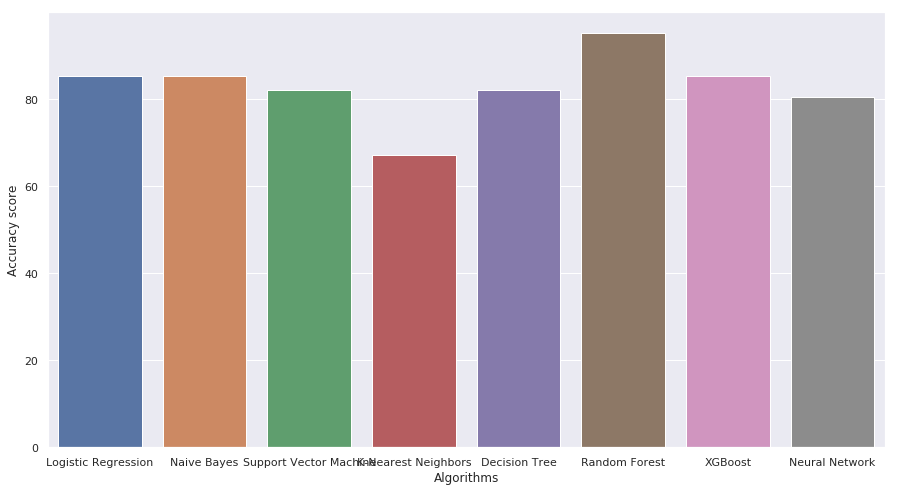

In [73]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)

### We observe that, we can achieve the best accuracy of 95.08% using Random Forest <br> <br>

### I'm a beginner to Kaggle, and am learning to practice Machine Learning code. I hope this Kernel can help out a few others, like myself, who are looking for a beginner-friendly kernel for getting better at Machine Learning,
### I'd love some feedback. If there's anything I've done wrong, or anything new or better that I can add to my code, I'd really appreciate valuable feedback on it. 

### Cheers!